<h1 align="center"><b>CS116.M12.KHCL - LẬP TRÌNH PYTHON CHO MÁY HỌC</b></h1>
<h1 align="center"><b>Bài tập 7: Linear Regression </b></h1>

**Sinh viên thực hiện:**
- Thái Trần Khánh Nguyên - 19520188

In [16]:
# Salary_Data
!gdown --id 1m8jU70jy9GG2Xp4efTuV1uJOPGogEwLJ
# 50_Startups
!gdown --id 106Zw4RcG1IY3PWV6QmBk9lbprQm23etx

Downloading...
From: https://drive.google.com/uc?id=1m8jU70jy9GG2Xp4efTuV1uJOPGogEwLJ
To: /content/Salary_Data.csv
100% 454/454 [00:00<00:00, 1.34MB/s]
Downloading...
From: https://drive.google.com/uc?id=106Zw4RcG1IY3PWV6QmBk9lbprQm23etx
To: /content/50_Startups.csv
100% 2.44k/2.44k [00:00<00:00, 1.97MB/s]


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Salary_Data

In [ ]:
salary_data = pd.read_csv('Salary_Data.csv')
score = lr.score(x_test, y_test, sample_weight=None)
print(score)
salary_data.head()

0.8987266414329448


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
X, y = salary_data.iloc[:,:-1], salary_data['Salary']

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

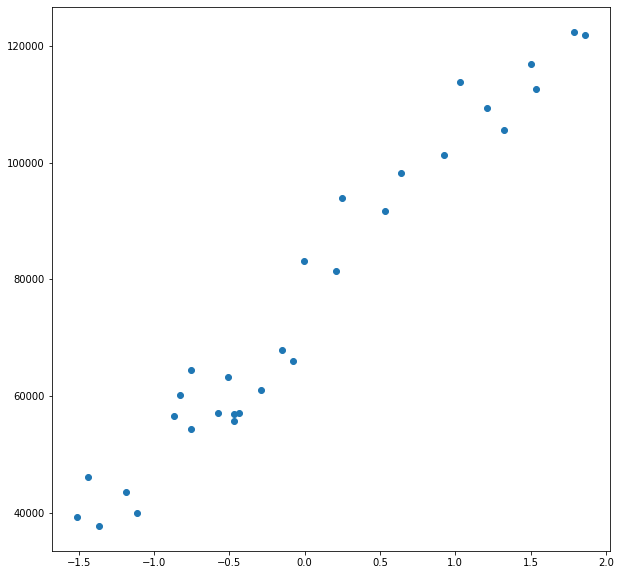

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(X, y, marker='o')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
x_train, y_train = np.asarray(x_train).reshape(-1, 1), np.asarray(y_train).reshape(-1, 1)
x_test, y_test = np.asarray(x_test).reshape(-1, 1), np.asarray(y_test).reshape(-1, 1)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
score = lr.score(x_test, y_test, sample_weight=None)
print(score)
pred = lr.predict(x_test)

0.9024461774180497


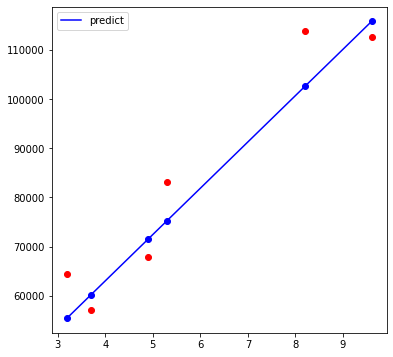

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x_test, y_test, c = 'r')
plt.scatter(x_test, pred, c = 'b')
plt.plot(sorted(x_test), sorted(pred), color = 'b', label='predict')
plt.legend()
plt.show()

## Cross_validation

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

In [ ]:
model_1 = LinearRegression()
scores = cross_val_score(model_1, X, y, cv=cv)

print('Đánh giá tổng thể các folds model Logistic Regression:')
print(f'=> Accuracy: {np.mean(scores)} (Độ lệch +- {np.std(scores)})')

Đánh giá tổng thể các folds model Logistic Regression:
=> Accuracy: 0.8807082623128748 (Độ lệch +- 0.08490357631069934)


# 50_Startups

In [20]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


##One-hot

In [21]:
df.groupby(df.State).count()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,17,17,17,17
Florida,16,16,16,16
New York,17,17,17,17


In [22]:
enc = OneHotEncoder(sparse = False)
categorical_features = [['California'], ['Florida'], ['New York']]
enc.fit(categorical_features)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [23]:
transform = enc.transform(df['State'].to_numpy().reshape(-1, 1))

In [24]:
enc.get_feature_names()

array(['x0_California', 'x0_Florida', 'x0_New York'], dtype=object)

In [25]:
new_state = pd.DataFrame(transform, columns = enc.get_feature_names())
new_df = pd.concat([df, new_state], axis=1).drop(['State'], axis = 1)
new_df.head()

,R&D Spend,Administration,Marketing Spend,Profit,x0_California,x0_Florida,x0_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


## Train

In [26]:
X, y = new_df[['R&D Spend', 'Administration', 'Marketing Spend', 'x0_California', 'x0_Florida', 'x0_New York']], new_df['Profit']
X.head()

,R&D Spend,Administration,Marketing Spend,x0_California,x0_Florida,x0_New York
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0


In [27]:
vquax_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [29]:
lr = LinearRegression()
lr.fit(vquax_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
score = lr.score(x_test, y_test, sample_weight=None)
print(score)

0.8987266414329448


In [31]:
pred = lr.predict(x_test)

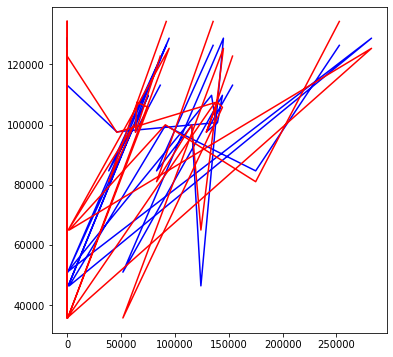

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(x_test, pred, color = 'b')
plt.plot(x_test, y_test, color = 'r')
plt.show()

##Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[('Linear Regression', LinearRegression())])
pipe.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('Linear Regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
pipe.score(x_test, y_test)

0.8987266414329448

## Visualize

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [33]:
x, y = df['R&D Spend'], df['Administration']

In [34]:
z = lr.predict(X)

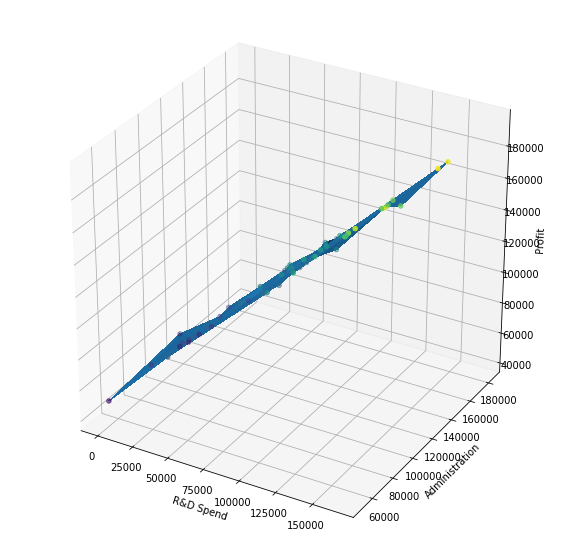

In [39]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z, linewidth=0, antialiased=False)
ax.scatter(x, y, z, c=z)
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Administration')
ax.set_zlabel('Profit')
plt.show()

#Position_Salaries

In [1]:
!gdown --id 1F-nLFUqGw4pvai_qTfN8N-g4_7_crjQp

Downloading...
From: https://drive.google.com/uc?id=1F-nLFUqGw4pvai_qTfN8N-g4_7_crjQp
To: /content/Position_Salaries.csv
100% 246/246 [00:00<00:00, 786kB/s]


In [3]:
data = pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
x=data.iloc[:,1:2].values                    # x = data.drop('Salary', 1)
y=data.iloc[:,2:].values                    

In [6]:
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)                 
y=sc_y.fit_transform(y)                  

In [7]:
x_train, y_train, x_test, y_test=train_test_split(x, y, train_size=0.7, random_state=100)
x_train.shape, x_test.shape

((7, 1), (7, 1))

## SVM

In [8]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0, 0.5, ' y - Dependent Variabel -->>')

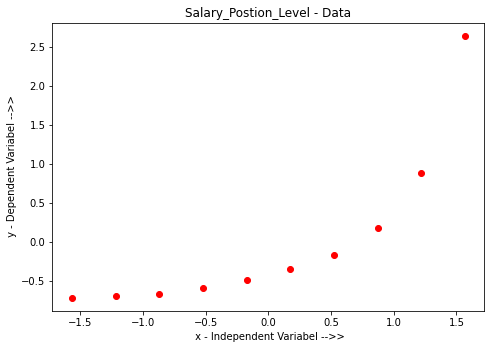

In [9]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x,y,color='r')
ax.set_title('Salary_Postion_Level - Data')
ax.set_xlabel(' x - Independent Variabel -->>')
ax.set_ylabel(' y - Dependent Variabel -->>')

Text(0, 0.5, 'y - Dependent Variabel -->> ')

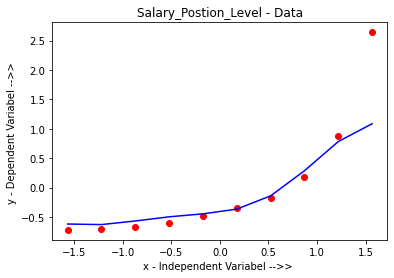

In [10]:
plt.scatter(x,y,color='red')
plt.plot(x, regressor.predict(x), color='blue')
plt.title('Salary_Postion_Level - Data')
plt.xlabel('x - Independent Variabel -->> ')
plt.ylabel('y - Dependent Variabel -->> ')

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)y_pred = regressor.predict(array(6.5).reshape(-1, 1))
regressor.fit(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

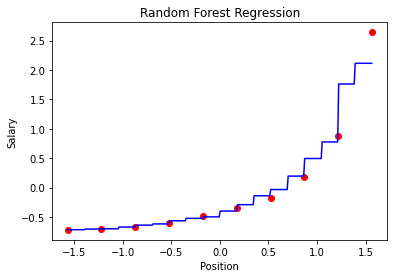

In [15]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()